In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_30d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 198s 7ms/step - loss: 0.7297 - acc: 0.5164 - val_loss: 0.7035 - val_acc: 0.5141
Epoch 2/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.7022 - acc: 0.4811 - val_loss: 0.6978 - val_acc: 0.4789
Epoch 3/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6976 - acc: 0.4770 - val_loss: 0.6954 - val_acc: 0.4788
Epoch 4/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6946 - acc: 0.4889 - val_loss: 0.6935 - val_acc: 0.4933
Epoch 5/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6921 - acc: 0.5206 - val_loss: 0.6918 - val_acc: 0.5236
Epoch 6/1000
27584/27584 [==============================] - 1s 25us/step - loss: 0.6899 - acc: 0.5532 - val_loss: 0.6903 - val_acc: 0.5440
Epoch 7/1000
27584/27584 [==============================] - 1s 27us/step - loss: 0.6879 - acc: 0.5635 - val_loss: 0.

27584/27584 [==============================] - 1s 18us/step - loss: 0.6626 - acc: 0.5956 - val_loss: 0.6760 - val_acc: 0.5485
Epoch 60/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6623 - acc: 0.5956 - val_loss: 0.6754 - val_acc: 0.5488
Epoch 61/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6620 - acc: 0.5961 - val_loss: 0.6751 - val_acc: 0.5491
Epoch 62/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6616 - acc: 0.5960 - val_loss: 0.6745 - val_acc: 0.5502
Epoch 63/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6613 - acc: 0.5963 - val_loss: 0.6748 - val_acc: 0.5482
Epoch 64/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6610 - acc: 0.5966 - val_loss: 0.6744 - val_acc: 0.5485
Epoch 65/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6607 - acc: 0.5970 - val_loss: 0.6738 - val_acc: 0.5504
Epoch 66/1000
27584/27584 [=======

27584/27584 [==============================] - 1s 19us/step - loss: 0.6522 - acc: 0.6268 - val_loss: 0.6651 - val_acc: 0.5904
Epoch 118/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6521 - acc: 0.6268 - val_loss: 0.6648 - val_acc: 0.5901
Epoch 119/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6520 - acc: 0.6262 - val_loss: 0.6644 - val_acc: 0.5910
Epoch 120/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6519 - acc: 0.6285 - val_loss: 0.6645 - val_acc: 0.5910
Epoch 121/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6518 - acc: 0.6280 - val_loss: 0.6643 - val_acc: 0.5910
Epoch 122/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6517 - acc: 0.6282 - val_loss: 0.6649 - val_acc: 0.5900
Epoch 123/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6516 - acc: 0.6275 - val_loss: 0.6643 - val_acc: 0.5904
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6471 - acc: 0.6318 - val_loss: 0.6610 - val_acc: 0.5885
Epoch 176/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6470 - acc: 0.6315 - val_loss: 0.6601 - val_acc: 0.5908
Epoch 177/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6470 - acc: 0.6317 - val_loss: 0.6608 - val_acc: 0.5882
Epoch 178/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6469 - acc: 0.6317 - val_loss: 0.6603 - val_acc: 0.5900
Epoch 179/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6468 - acc: 0.6320 - val_loss: 0.6605 - val_acc: 0.5894
Epoch 180/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6467 - acc: 0.6315 - val_loss: 0.6601 - val_acc: 0.5903
Epoch 181/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6466 - acc: 0.6316 - val_loss: 0.6604 - val_acc: 0.5887
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6433 - acc: 0.6325 - val_loss: 0.6579 - val_acc: 0.5898
Epoch 234/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6433 - acc: 0.6323 - val_loss: 0.6576 - val_acc: 0.5905
Epoch 235/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6432 - acc: 0.6321 - val_loss: 0.6567 - val_acc: 0.5921
Epoch 236/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6432 - acc: 0.6321 - val_loss: 0.6573 - val_acc: 0.5908
Epoch 237/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6431 - acc: 0.6327 - val_loss: 0.6576 - val_acc: 0.5898
Epoch 238/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6431 - acc: 0.6317 - val_loss: 0.6565 - val_acc: 0.5920
Epoch 239/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6430 - acc: 0.6321 - val_loss: 0.6572 - val_acc: 0.5905
Epoch 240/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6414 - acc: 0.6326 - val_loss: 0.6545 - val_acc: 0.5914
Epoch 292/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6414 - acc: 0.6326 - val_loss: 0.6552 - val_acc: 0.5898
Epoch 293/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6413 - acc: 0.6329 - val_loss: 0.6551 - val_acc: 0.5903
Epoch 294/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6413 - acc: 0.6324 - val_loss: 0.6551 - val_acc: 0.5903
Epoch 295/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6413 - acc: 0.6322 - val_loss: 0.6549 - val_acc: 0.5914
Epoch 296/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6413 - acc: 0.6321 - val_loss: 0.6542 - val_acc: 0.5929
Epoch 297/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6413 - acc: 0.6323 - val_loss: 0.6553 - val_acc: 0.5897
Epoch 298/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6405 - acc: 0.6329 - val_loss: 0.6532 - val_acc: 0.5984
Epoch 350/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6406 - acc: 0.6326 - val_loss: 0.6545 - val_acc: 0.5917
Epoch 351/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6406 - acc: 0.6328 - val_loss: 0.6535 - val_acc: 0.5959
Epoch 352/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6406 - acc: 0.6327 - val_loss: 0.6544 - val_acc: 0.5910
Epoch 353/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6406 - acc: 0.6333 - val_loss: 0.6547 - val_acc: 0.5905
Epoch 354/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6406 - acc: 0.6329 - val_loss: 0.6539 - val_acc: 0.5917
Epoch 355/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6406 - acc: 0.6323 - val_loss: 0.6540 - val_acc: 0.5919
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6403 - acc: 0.6332 - val_loss: 0.6534 - val_acc: 0.5943
Epoch 408/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6403 - acc: 0.6329 - val_loss: 0.6544 - val_acc: 0.5905
Epoch 409/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6403 - acc: 0.6321 - val_loss: 0.6540 - val_acc: 0.5923
Epoch 410/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6403 - acc: 0.6332 - val_loss: 0.6535 - val_acc: 0.5937
Epoch 411/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6402 - acc: 0.6330 - val_loss: 0.6546 - val_acc: 0.5903
Epoch 412/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6403 - acc: 0.6334 - val_loss: 0.6538 - val_acc: 0.5933
Epoch 413/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6402 - acc: 0.6331 - val_loss: 0.6534 - val_acc: 0.5949
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6401 - acc: 0.6340 - val_loss: 0.6537 - val_acc: 0.5930
Epoch 466/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6401 - acc: 0.6322 - val_loss: 0.6540 - val_acc: 0.5919
Epoch 467/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6401 - acc: 0.6341 - val_loss: 0.6531 - val_acc: 0.5962
Epoch 468/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6401 - acc: 0.6327 - val_loss: 0.6532 - val_acc: 0.5958
Epoch 469/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6401 - acc: 0.6327 - val_loss: 0.6539 - val_acc: 0.5932
Epoch 470/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6401 - acc: 0.6336 - val_loss: 0.6537 - val_acc: 0.5933
Epoch 471/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6401 - acc: 0.6341 - val_loss: 0.6540 - val_acc: 0.5940
Epoch 472/1000
27584/27584 [

Epoch 523/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6399 - acc: 0.6334 - val_loss: 0.6539 - val_acc: 0.5932
Epoch 524/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6399 - acc: 0.6338 - val_loss: 0.6537 - val_acc: 0.5936
Epoch 525/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6399 - acc: 0.6344 - val_loss: 0.6541 - val_acc: 0.5927
Epoch 526/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6399 - acc: 0.6329 - val_loss: 0.6535 - val_acc: 0.5945
Epoch 527/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6399 - acc: 0.6337 - val_loss: 0.6538 - val_acc: 0.5926
Epoch 528/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6399 - acc: 0.6337 - val_loss: 0.6538 - val_acc: 0.5930
Epoch 529/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6399 - acc: 0.6330 - val_loss: 0.6538 - val_acc: 0.5930
Epoch 530/100

27584/27584 [==============================] - 0s 16us/step - loss: 0.6398 - acc: 0.6339 - val_loss: 0.6536 - val_acc: 0.5940
Epoch 582/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6398 - acc: 0.6329 - val_loss: 0.6535 - val_acc: 0.5940
Epoch 583/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6398 - acc: 0.6341 - val_loss: 0.6533 - val_acc: 0.5965
Epoch 584/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6398 - acc: 0.6334 - val_loss: 0.6531 - val_acc: 0.5991
Epoch 585/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6398 - acc: 0.6334 - val_loss: 0.6534 - val_acc: 0.5953
Epoch 586/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6398 - acc: 0.6333 - val_loss: 0.6536 - val_acc: 0.5936
Epoch 587/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6398 - acc: 0.6330 - val_loss: 0.6539 - val_acc: 0.5934
Epoch 588/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6396 - acc: 0.6342 - val_loss: 0.6537 - val_acc: 0.5934
Epoch 640/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6397 - acc: 0.6341 - val_loss: 0.6537 - val_acc: 0.5934
Epoch 641/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6396 - acc: 0.6339 - val_loss: 0.6540 - val_acc: 0.5930
Epoch 642/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6396 - acc: 0.6340 - val_loss: 0.6551 - val_acc: 0.5904
Epoch 643/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6397 - acc: 0.6344 - val_loss: 0.6541 - val_acc: 0.5929
Epoch 644/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6397 - acc: 0.6342 - val_loss: 0.6533 - val_acc: 0.5959
Epoch 645/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6396 - acc: 0.6325 - val_loss: 0.6535 - val_acc: 0.5945
Epoch 646/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6395 - acc: 0.6332 - val_loss: 0.6527 - val_acc: 0.6006
Epoch 698/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6395 - acc: 0.6329 - val_loss: 0.6529 - val_acc: 0.6000
Epoch 699/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6395 - acc: 0.6341 - val_loss: 0.6535 - val_acc: 0.5950
Epoch 700/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6395 - acc: 0.6338 - val_loss: 0.6541 - val_acc: 0.5932
Epoch 701/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6395 - acc: 0.6341 - val_loss: 0.6539 - val_acc: 0.5934
Epoch 702/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6395 - acc: 0.6346 - val_loss: 0.6538 - val_acc: 0.5937
Epoch 703/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6395 - acc: 0.6339 - val_loss: 0.6539 - val_acc: 0.5936
Epoch 704/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6394 - acc: 0.6347 - val_loss: 0.6532 - val_acc: 0.5969
Epoch 756/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6394 - acc: 0.6342 - val_loss: 0.6532 - val_acc: 0.5978
Epoch 757/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6394 - acc: 0.6342 - val_loss: 0.6536 - val_acc: 0.5939
Epoch 758/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6394 - acc: 0.6336 - val_loss: 0.6537 - val_acc: 0.5936
Epoch 759/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6392 - acc: 0.6329 - val_loss: 0.6532 - val_acc: 0.5972
Epoch 760/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6393 - acc: 0.6339 - val_loss: 0.6530 - val_acc: 0.5997
Epoch 761/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6394 - acc: 0.6339 - val_loss: 0.6535 - val_acc: 0.5952
Epoch 762/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6393 - acc: 0.6342 - val_loss: 0.6537 - val_acc: 0.5939
Epoch 814/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6341 - val_loss: 0.6530 - val_acc: 0.5988
Epoch 815/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6345 - val_loss: 0.6529 - val_acc: 0.5991
Epoch 816/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6350 - val_loss: 0.6533 - val_acc: 0.5962
Epoch 817/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6393 - acc: 0.6346 - val_loss: 0.6537 - val_acc: 0.5937
Epoch 818/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6392 - acc: 0.6345 - val_loss: 0.6537 - val_acc: 0.5937
Epoch 819/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6341 - val_loss: 0.6540 - val_acc: 0.5929
Epoch 820/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6392 - acc: 0.6352 - val_loss: 0.6534 - val_acc: 0.5965
Epoch 872/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6391 - acc: 0.6345 - val_loss: 0.6533 - val_acc: 0.5966
Epoch 873/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6391 - acc: 0.6345 - val_loss: 0.6533 - val_acc: 0.5968
Epoch 874/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6391 - acc: 0.6350 - val_loss: 0.6537 - val_acc: 0.5942
Epoch 875/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6391 - acc: 0.6350 - val_loss: 0.6533 - val_acc: 0.5965
Epoch 876/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6391 - acc: 0.6346 - val_loss: 0.6546 - val_acc: 0.5900
Epoch 877/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6391 - acc: 0.6350 - val_loss: 0.6533 - val_acc: 0.5968
Epoch 878/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6390 - acc: 0.6348 - val_loss: 0.6533 - val_acc: 0.5968
Epoch 930/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6390 - acc: 0.6348 - val_loss: 0.6534 - val_acc: 0.5959
Epoch 931/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6389 - acc: 0.6348 - val_loss: 0.6551 - val_acc: 0.5905
Epoch 932/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6390 - acc: 0.6345 - val_loss: 0.6531 - val_acc: 0.5985
Epoch 933/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6390 - acc: 0.6345 - val_loss: 0.6532 - val_acc: 0.5975
Epoch 934/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6389 - acc: 0.6345 - val_loss: 0.6536 - val_acc: 0.5945
Epoch 935/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6390 - acc: 0.6346 - val_loss: 0.6530 - val_acc: 0.5992
Epoch 936/1000
27584/27584 [

27584/27584 [==============================] - 0s 10us/step - loss: 0.6388 - acc: 0.6348 - val_loss: 0.6533 - val_acc: 0.5978
Epoch 988/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6388 - acc: 0.6348 - val_loss: 0.6533 - val_acc: 0.5974
Epoch 989/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6388 - acc: 0.6348 - val_loss: 0.6530 - val_acc: 0.5984
Epoch 990/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6388 - acc: 0.6335 - val_loss: 0.6533 - val_acc: 0.5975
Epoch 991/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6342 - val_loss: 0.6535 - val_acc: 0.5961
Epoch 992/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6340 - val_loss: 0.6530 - val_acc: 0.5979
Epoch 993/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6388 - acc: 0.6347 - val_loss: 0.6534 - val_acc: 0.5974
Epoch 994/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199936F5320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019994999B38>]], dtype=object)

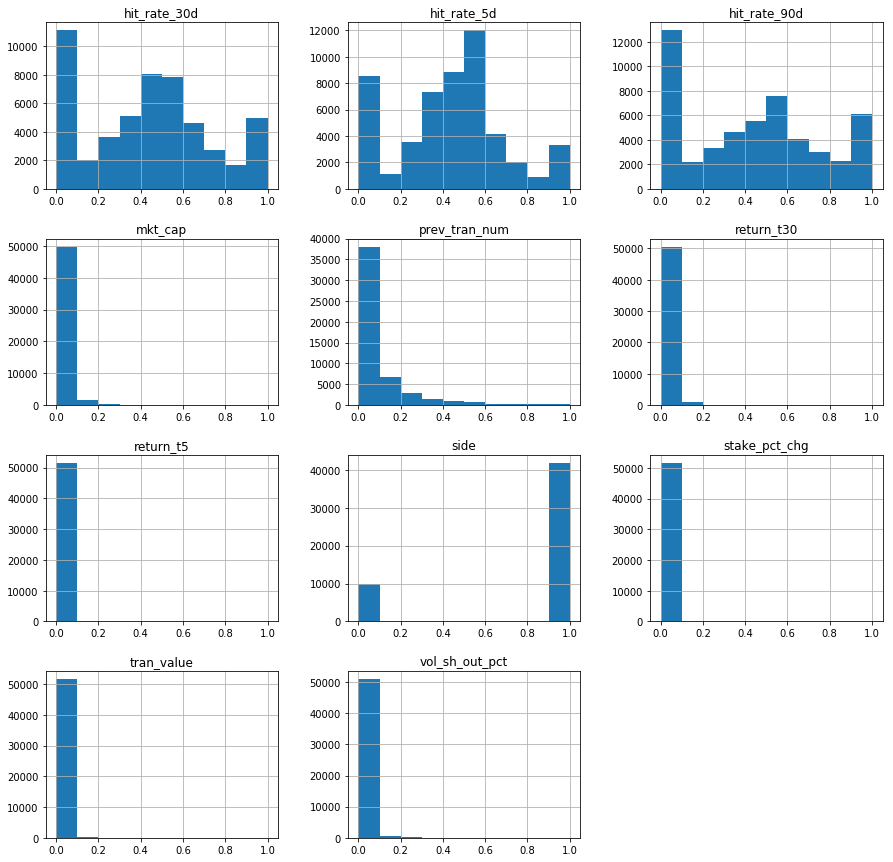

In [6]:
df[col_list].hist(figsize = [15,15])

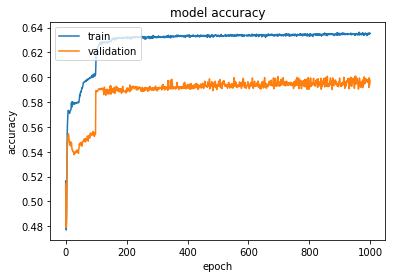

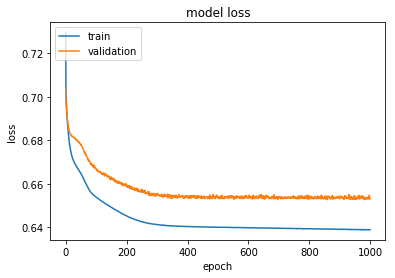

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_30d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_30d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 26us/step
[Train] acc: 62.76%
17240/17240 [==============================] - 0s 25us/step
[Test] acc: 59.69%
